In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')


In [84]:
churn = pd.read_csv('customer_data.csv')

In [85]:
churn.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation
0,26342,1,05-Aug-14,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1
1,38851,0,17-Oct-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1
2,32312,0,31-Mar-16,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1
3,46203,0,17-Mar-14,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0
4,12234,0,05-May-14,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1


In [86]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
Customer Id              600 non-null int64
CustomerChurn            600 non-null int64
LastInvoiceDate          600 non-null object
AvgInvoiceAmount         600 non-null int64
LocationName             600 non-null object
Zip                      600 non-null object
AvgMiles                 600 non-null float64
NoCalls                  600 non-null int64
ClaimsMade               600 non-null int64
DelayedQuote             600 non-null int64
PickupDelay              600 non-null int64
DeliveryDelay            600 non-null int64
VolumeChange             600 non-null int64
PriceChangedPostQuote    600 non-null int64
CompetitorsPresent       600 non-null int64
CurrentInflation         600 non-null int64
dtypes: float64(1), int64(12), object(3)
memory usage: 75.1+ KB


# Exploratory Data Analysis

In [87]:
import missingno as msno

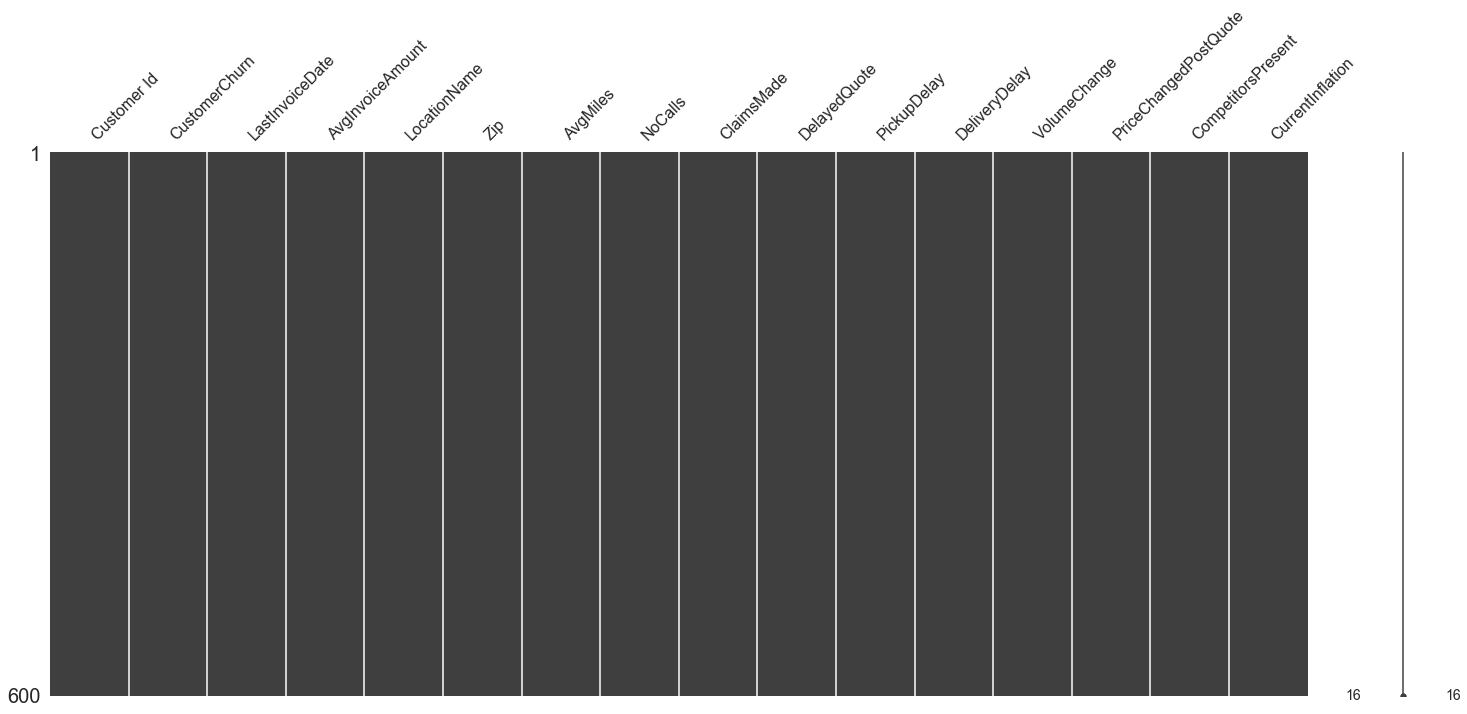

In [88]:
msno.matrix(churn)

> There are no missing values in the data 

> Churn is basically knowing if a customer is a recurring cutomer or not. 

>So, For EX: If it has been 3 years since the cutomer last purchased a product he is considered a churner. 

>The threshold can be set based on the product being sold

Now we assume the current date as the present working date and we find out the no. of days since a customer has last purchased a product until today

In [89]:
churn.loc[:, 'LastInvoiceDate'] = churn['LastInvoiceDate'].apply(lambda x: pd.datetime.strptime(x, '%d-%b-%y'))

In [90]:
churn.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation
0,26342,1,2014-08-05,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1


In [91]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
Customer Id              600 non-null int64
CustomerChurn            600 non-null int64
LastInvoiceDate          600 non-null datetime64[ns]
AvgInvoiceAmount         600 non-null int64
LocationName             600 non-null object
Zip                      600 non-null object
AvgMiles                 600 non-null float64
NoCalls                  600 non-null int64
ClaimsMade               600 non-null int64
DelayedQuote             600 non-null int64
PickupDelay              600 non-null int64
DeliveryDelay            600 non-null int64
VolumeChange             600 non-null int64
PriceChangedPostQuote    600 non-null int64
CompetitorsPresent       600 non-null int64
CurrentInflation         600 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(12), object(2)
memory usage: 75.1+ KB


In [92]:
churn['curr_date'] = pd.to_datetime('today')

In [93]:
churn.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,curr_date
0,26342,1,2014-08-05,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1,2018-12-28 14:26:50.616022
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1,2018-12-28 14:26:50.616022
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1,2018-12-28 14:26:50.616022
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0,2018-12-28 14:26:50.616022
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1,2018-12-28 14:26:50.616022


In [94]:
churn['curr_date'] = pd.to_datetime(churn['curr_date']).dt.normalize()

In [95]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
Customer Id              600 non-null int64
CustomerChurn            600 non-null int64
LastInvoiceDate          600 non-null datetime64[ns]
AvgInvoiceAmount         600 non-null int64
LocationName             600 non-null object
Zip                      600 non-null object
AvgMiles                 600 non-null float64
NoCalls                  600 non-null int64
ClaimsMade               600 non-null int64
DelayedQuote             600 non-null int64
PickupDelay              600 non-null int64
DeliveryDelay            600 non-null int64
VolumeChange             600 non-null int64
PriceChangedPostQuote    600 non-null int64
CompetitorsPresent       600 non-null int64
CurrentInflation         600 non-null int64
curr_date                600 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(12), object(2)
memory usage: 79.8+ KB


In [96]:
churn.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,curr_date
0,26342,1,2014-08-05,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1,2018-12-28
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1,2018-12-28
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1,2018-12-28
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0,2018-12-28
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1,2018-12-28


> In order to find out the no of days since a product has been purchased by a customer, we add a new column that has the current date information. Now we can find the date diff between last purchase and the current date.

In [97]:
churn['days_since_last_purchase'] = churn['curr_date'] - churn['LastInvoiceDate']

In [98]:
churn.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,curr_date,days_since_last_purchase
0,26342,1,2014-08-05,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1,2018-12-28,1606 days
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1,2018-12-28,437 days
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1,2018-12-28,1002 days
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0,2018-12-28,1747 days
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1,2018-12-28,1698 days


> Now, we have information about the duration since the last purchase of a customer

In [99]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
Customer Id                 600 non-null int64
CustomerChurn               600 non-null int64
LastInvoiceDate             600 non-null datetime64[ns]
AvgInvoiceAmount            600 non-null int64
LocationName                600 non-null object
Zip                         600 non-null object
AvgMiles                    600 non-null float64
NoCalls                     600 non-null int64
ClaimsMade                  600 non-null int64
DelayedQuote                600 non-null int64
PickupDelay                 600 non-null int64
DeliveryDelay               600 non-null int64
VolumeChange                600 non-null int64
PriceChangedPostQuote       600 non-null int64
CompetitorsPresent          600 non-null int64
CurrentInflation            600 non-null int64
curr_date                   600 non-null datetime64[ns]
days_since_last_purchase    600 non-null timedelta64[ns]
dtypes: datetime6

In [100]:
churn[['Customer Id','days_since_last_purchase']].sort_values(by = 'days_since_last_purchase', ascending = False).head(25)

,Customer Id,days_since_last_purchase
52,52724,2182 days
597,47439,2182 days
361,34443,2176 days
22,6584,2176 days
260,19414,2172 days
255,31570,2169 days
223,53149,2161 days
23,27072,2161 days
535,13144,2159 days
328,14289,2153 days


> These are the top 25 cutomers who haven't bought a product for a long time. There is high chance that these cutomers are churners

In [101]:
churn['days_since_last_purchase'] = churn['days_since_last_purchase'] / np.timedelta64(1, 'D')


> We are converting the days_since last purchase column to Float from timedelta. We are doing this to bin the values 

In [102]:
churn.CustomerChurn.value_counts()

0    535
1     65
Name: CustomerChurn, dtype: int64

In [103]:
churn.head()

,Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation,curr_date,days_since_last_purchase
0,26342,1,2014-08-05,4935,"Carlyle,Illinois",62231,433.502492,0,0,0,0,0,0,0,0,1,2018-12-28,1606.0
1,38851,0,2017-10-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1,2018-12-28,437.0
2,32312,0,2016-03-31,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1,2018-12-28,1002.0
3,46203,0,2014-03-17,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0,2018-12-28,1747.0
4,12234,0,2014-05-05,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1,2018-12-28,1698.0


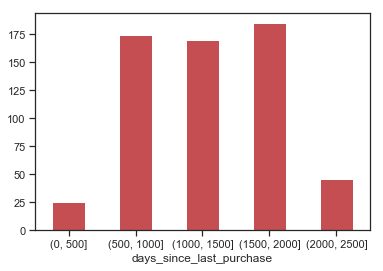

In [104]:
bins = pd.cut(churn['days_since_last_purchase'], [0, 500, 1000, 1500,2000,2500])
a = churn.groupby(bins)['days_since_last_purchase'].agg(['count'])
ax = a['count'].plot.bar(rot=0, color="r", figsize=(6,4))
plt.show()

> We can see the no of people in each range which has the no of days since purchase

In [105]:
nd = churn[(churn['days_since_last_purchase'] >= 0) & (churn['days_since_last_purchase'] <= 500)].groupby('CustomerChurn').count()
nd1 = churn[(churn['days_since_last_purchase'] > 500) & (churn['days_since_last_purchase'] <= 1000)].groupby('CustomerChurn').count()
nd2 = churn[(churn['days_since_last_purchase'] > 1000) & (churn['days_since_last_purchase'] <= 1500)].groupby('CustomerChurn').count()
nd3 = churn[(churn['days_since_last_purchase'] > 1500) & (churn['days_since_last_purchase'] <= 2000)].groupby('CustomerChurn').count()
nd4 = churn[(churn['days_since_last_purchase'] > 2000) & (churn['days_since_last_purchase'] <= 2500)].groupby('CustomerChurn').count()

In [106]:
a

,count
days_since_last_purchase,
"(0, 500]",25
"(500, 1000]",174
"(1000, 1500]",170
"(1500, 2000]",185
"(2000, 2500]",46


In [107]:
a['NoChurn'] = ['30','173','143','154','35']
a['Churners'] = ['0','0','25','29','11']

> We just add the values based on the values we got earlier

In [108]:
a['Churners'] = a['Churners'].astype('int64')
a['NoChurn'] = a['NoChurn'].astype('int64')

In [109]:
a

,count,NoChurn,Churners
days_since_last_purchase,,,
"(0, 500]",25,30,0
"(500, 1000]",174,173,0
"(1000, 1500]",170,143,25
"(1500, 2000]",185,154,29
"(2000, 2500]",46,35,11


In [110]:
a.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 5 entries, (0, 500] to (2000, 2500]
Data columns (total 3 columns):
count       5 non-null int64
NoChurn     5 non-null int64
Churners    5 non-null int64
dtypes: int64(3)
memory usage: 205.0 bytes


In [111]:
#a['count'].plot.bar(rot=0, color="r", figsize=(10,10), label = 'Total Count')


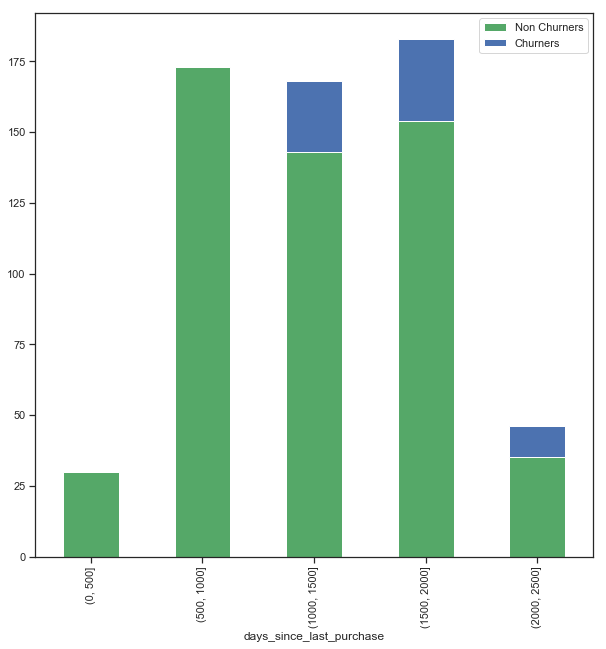

In [112]:
#a['count'].plot.bar(rot=0, color="r", figsize=(10,10), label = 'Total Count')
a['NoChurn'].plot.bar(color="g", figsize=(10,10), label = 'Non Churners')
a['Churners'].plot.bar(color="b", figsize=(10,10), bottom = a['NoChurn'], label = 'Churners')
plt.legend()
plt.show()

From the following Bar Chart, we can interpret that there are Churner only after 1000 days since purchase of any product. There are no churners for the first the first 1000 days since a product has last been purchased by a customer.

In [113]:
a

,count,NoChurn,Churners
days_since_last_purchase,,,
"(0, 500]",25,30,0
"(500, 1000]",174,173,0
"(1000, 1500]",170,143,25
"(1500, 2000]",185,154,29
"(2000, 2500]",46,35,11


# Simple Univariate Analysis

In [164]:
df1 = churn

In [115]:
df3 = df1.drop(df1[['LastInvoiceDate','curr_date','Zip','LocationName','AvgMiles','days_since_last_purchase','Customer Id','AvgInvoiceAmount']], axis = 1)

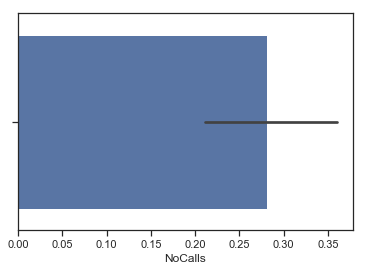

In [116]:
import seaborn as sns
callsplot = sns.barplot(x=churn.NoCalls)

In [117]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
CustomerChurn            600 non-null int64
NoCalls                  600 non-null int64
ClaimsMade               600 non-null int64
DelayedQuote             600 non-null int64
PickupDelay              600 non-null int64
DeliveryDelay            600 non-null int64
VolumeChange             600 non-null int64
PriceChangedPostQuote    600 non-null int64
CompetitorsPresent       600 non-null int64
CurrentInflation         600 non-null int64
dtypes: int64(10)
memory usage: 47.0 KB


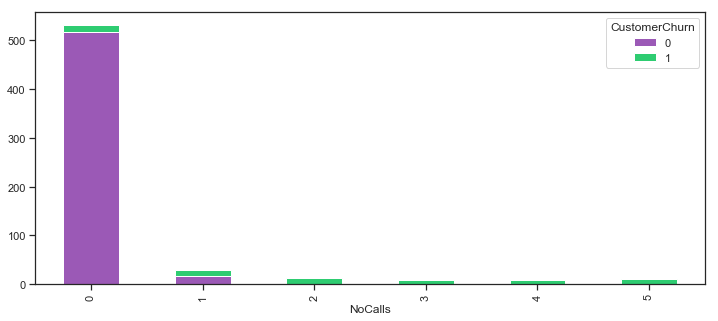

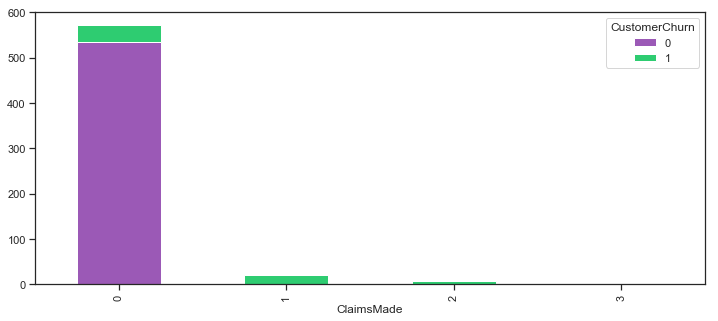

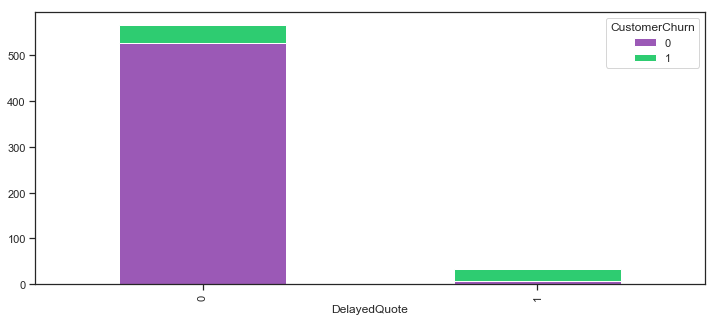

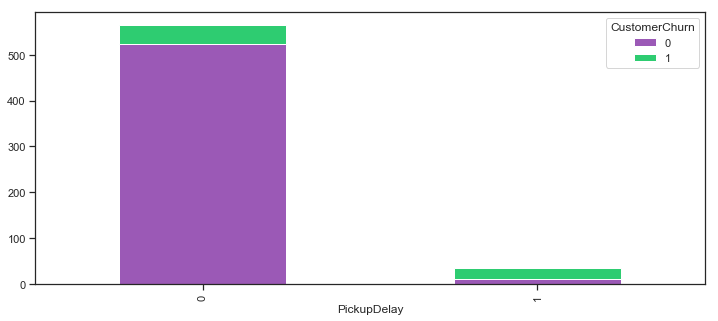

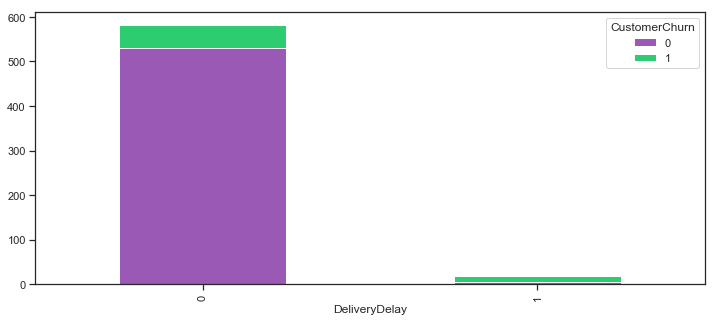

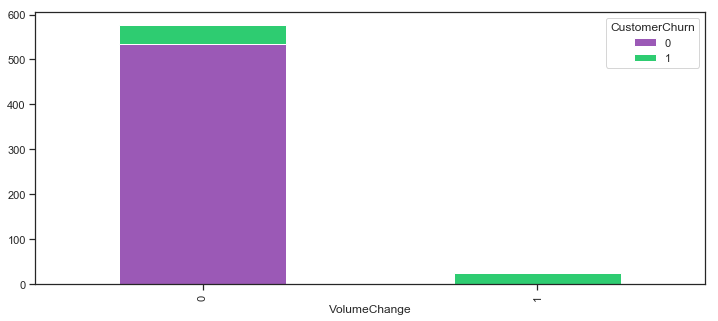

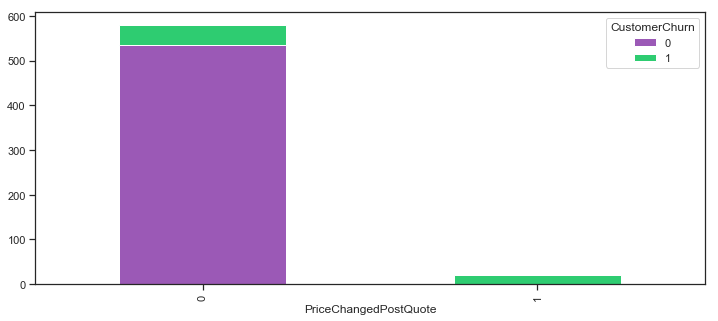

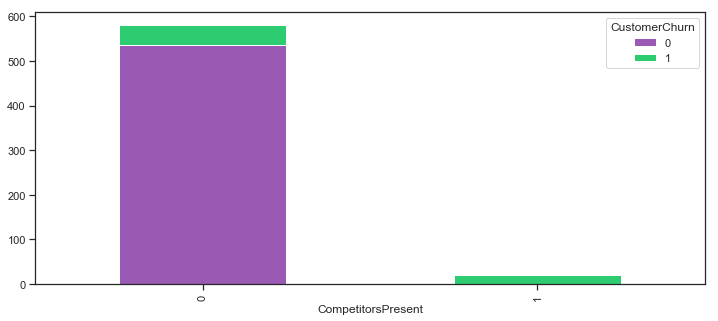

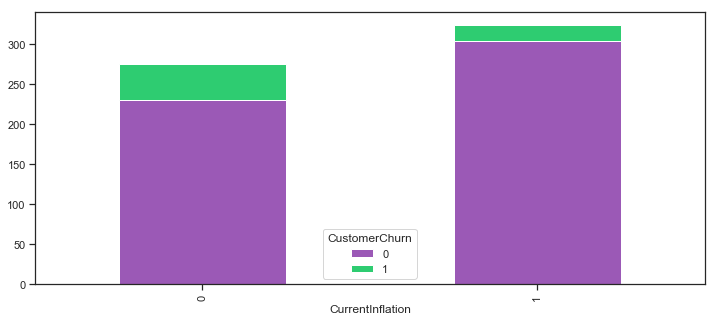

In [118]:
from matplotlib.colors import ListedColormap
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for column in df3.columns[1:]:  # Loop over all columns except 'CustomerChurn'
    #plt.ylim(-10,10)
    df3.groupby([column, "CustomerChurn"]).size().unstack().plot(kind='bar', stacked=True
    ,figsize=(12,5), colormap=ListedColormap(sns.color_palette(flatui, 6)), ) 


Let us try and interpret each plot seperately, 

> In the no-calls plot we can see that people who usually make 2 calls or more stop buying products completely.

> Similarly, if a customer claims damaged goods more than once. They stop buying the product.

> If there is a delay people churn but not all of them end up as churners. Some of them don't churn. 

> Inflation does not affect churn as much.

# Bi-Variate Analysis using Box Plots

> First we plot boxplots for the continuous columns mainly to check the spread of the data. 

> Also, we plot them w.r.t the Customer Churn columns so that we can how and when customers start churning

In [119]:
df2 = churn[['AvgMiles','AvgInvoiceAmount','CustomerChurn']]

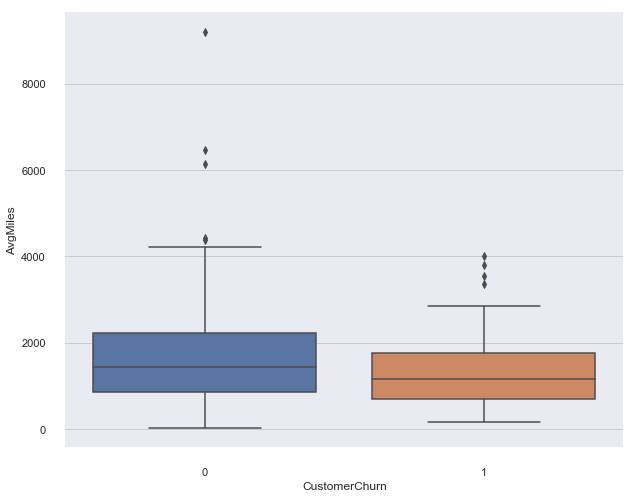

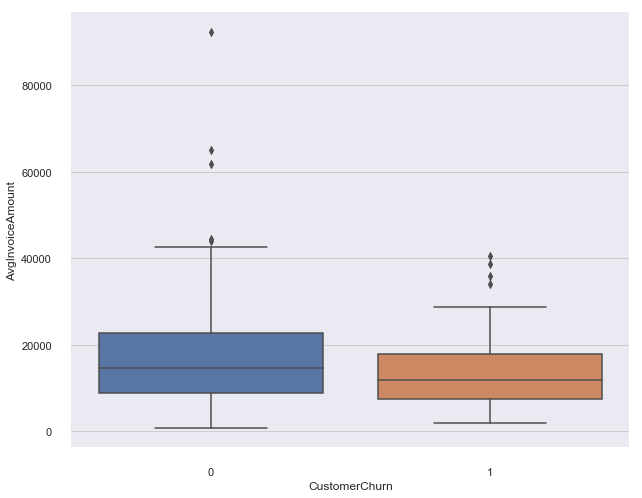

In [120]:
for column in df2.columns[:2]:  # Loop over all columns except 'CustomerChurn'
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.boxplot(x='CustomerChurn', y=column, data=df1)  # column is chosen here
    sns.despine(offset=10, trim=True) 
    fig.set_size_inches(10,8)


From the box plots we can clearly see that,

> In the case of AvgMiles delivered, people who churn are within 2000 avg miles of delivery. Also the data is'nt skewed to level where it might cause problems.

> In Avg Invoice Amount, we can see that people who churn have an average purchase value of less than 20000

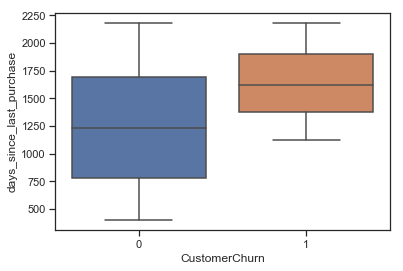

In [121]:
sns.boxplot(data = churn, y = 'days_since_last_purchase', x = 'CustomerChurn')


> This plot helps us see when customers start churning. 

> We can observe that, Customers churn after 1300 days. This might mean that a company might set the threshold for Churning as 1200 days. FYI in this case, we have set the threshold.

Please do not run the code below

In [53]:
Image(filename='/Users/anish/Downloads/Sheet 14.png', height = 1000, width = 1000)
#Zoom into the image if you want to look at it more clearly

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anish/Downloads/Sheet 14.png'

We can clearly see that Churners are not location specific. It happens randomly. From this, we can exclude sitations like delay in delivery of logistics to a certain area. But there is one thing we can notice from the map i.e there are more churners in the East Coast of the country.

Lets, us analyze further to try and find out the reason

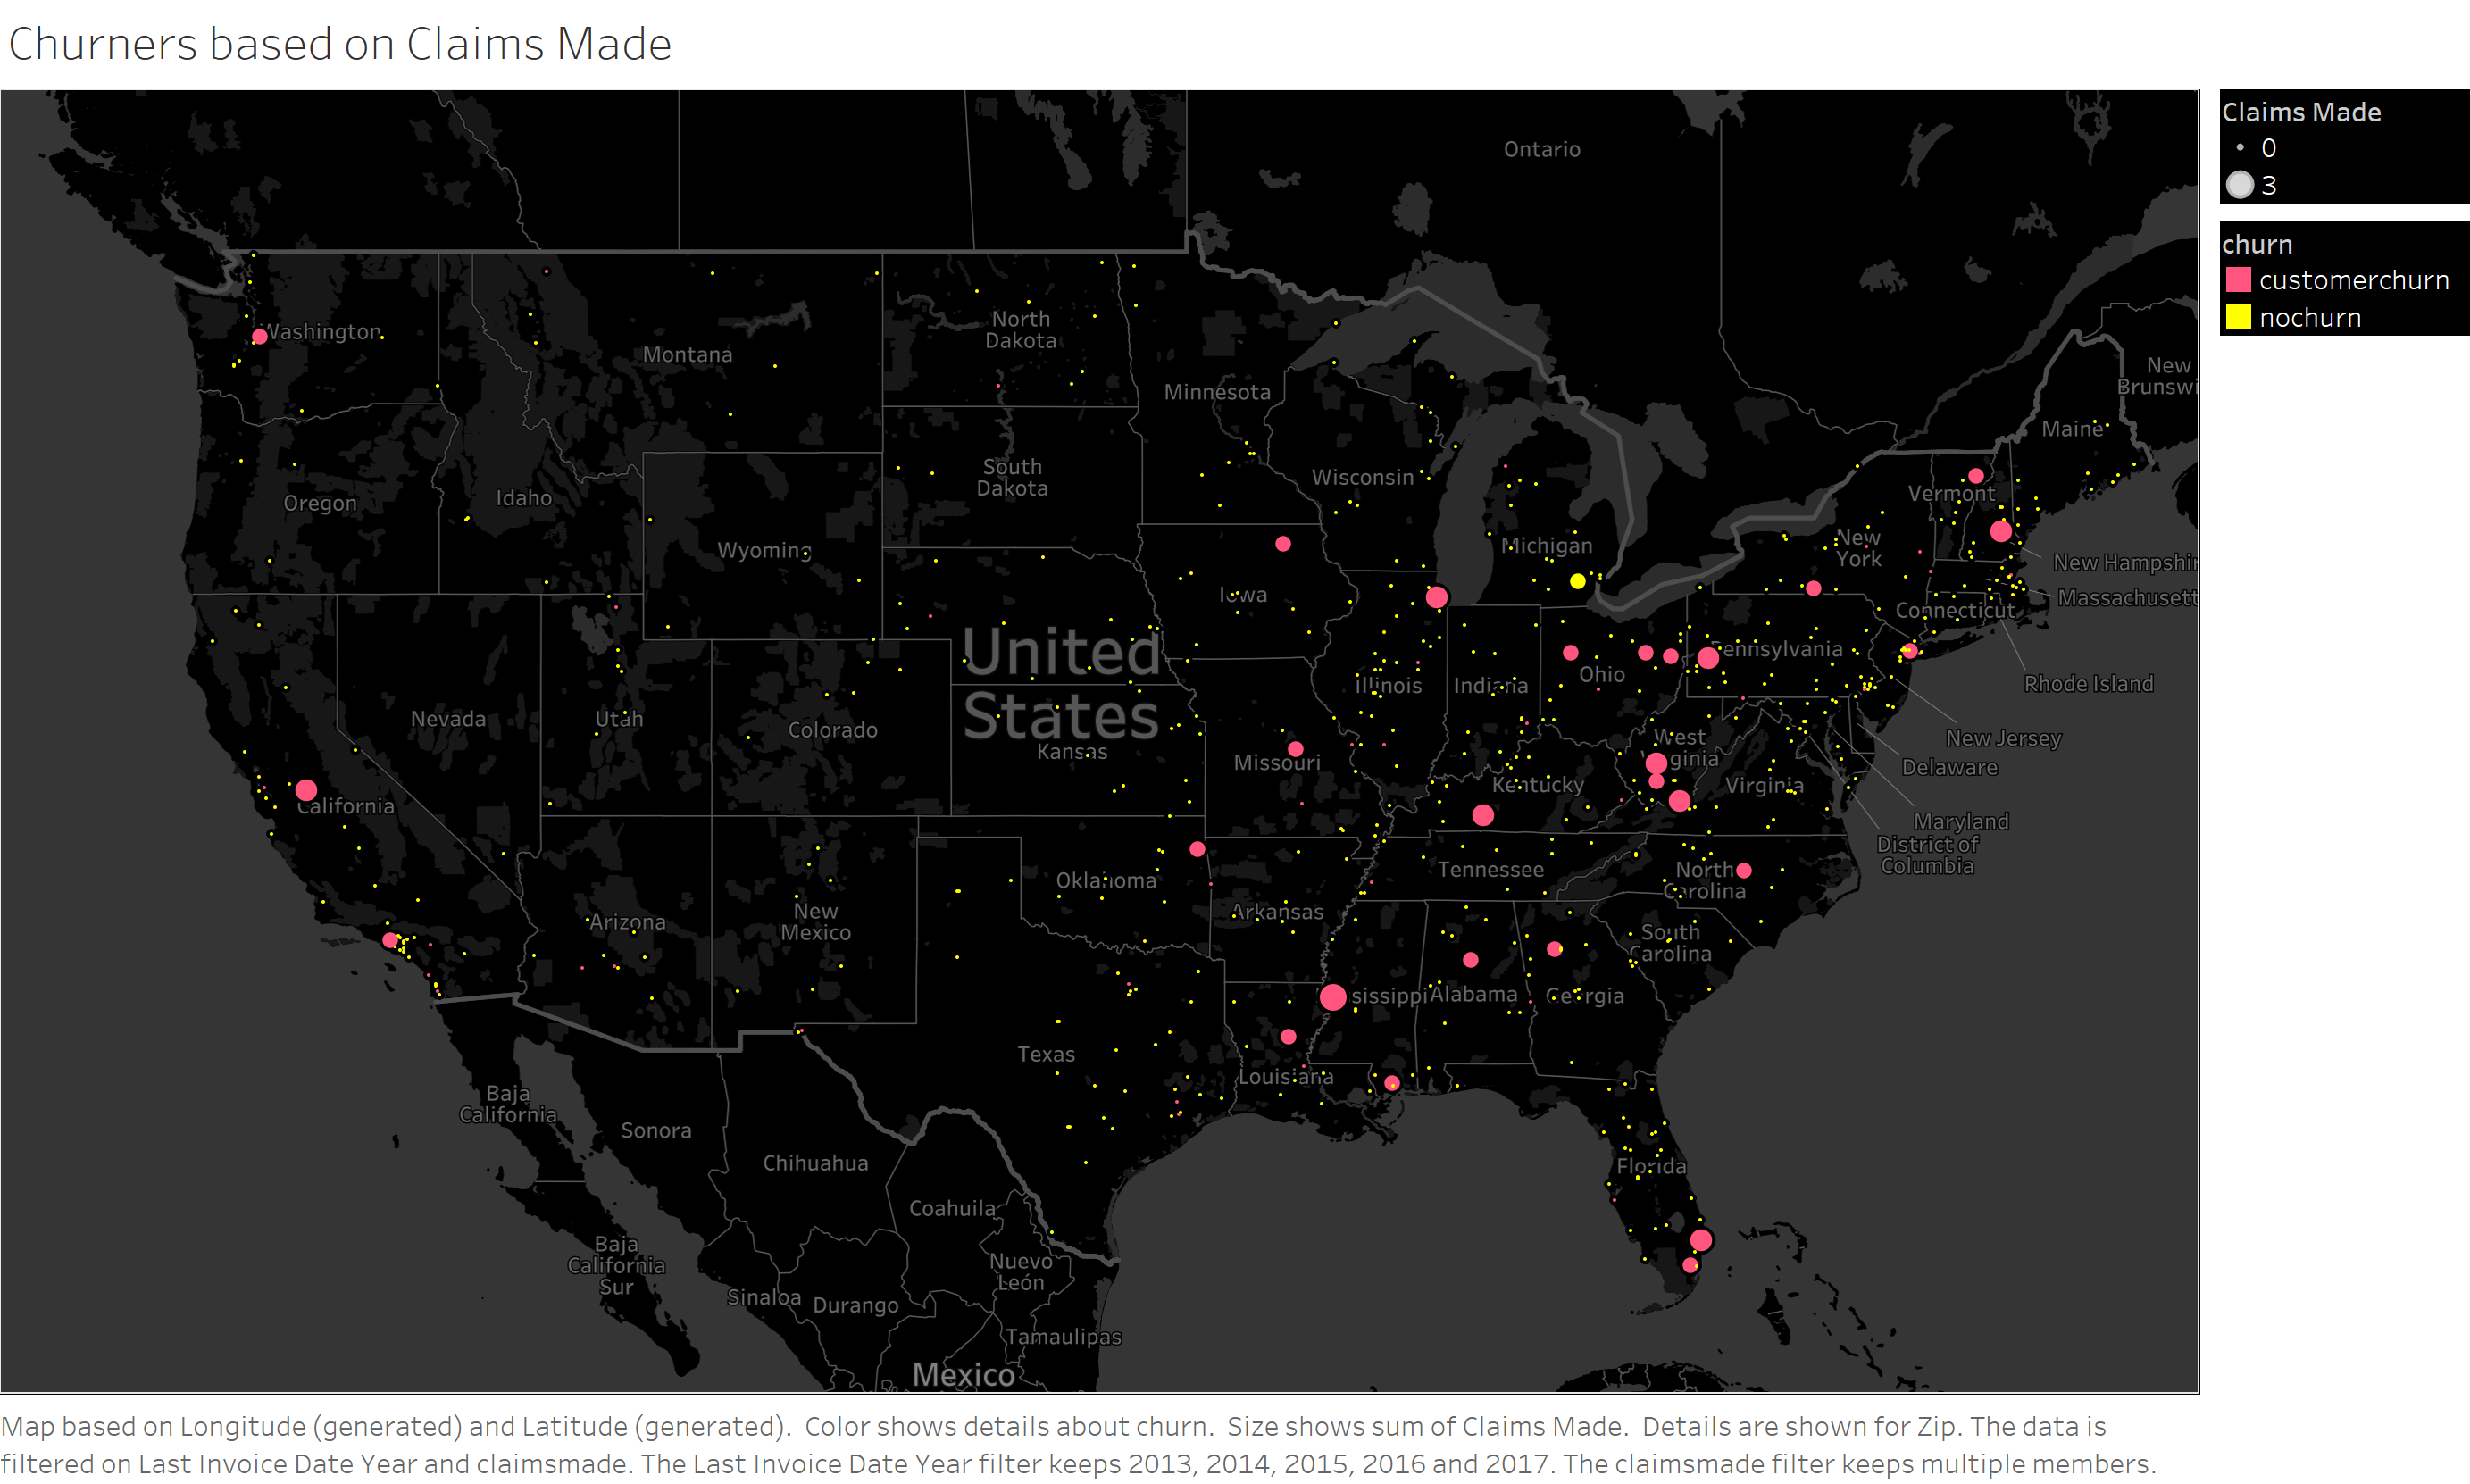

In [110]:
Image(filename='/Users/anish/Downloads/Sheet 2 (10).png', height = 1000, width = 1000)



Here we are seeing if customers churn or not based on the claims made. Claim is valued if a customer complaints that the goods he recieved are damaged. We can Clearly see that there more people who stopped buying products after recieving damaged goods. We can see that people stop buying products even if they recived goods that have not been damaged but it's comparitively to the damaged product churners.

Again, like before we notice that there are more claims and more churners towards the east coast of the country. So, from this we know that there is problem towards the east coast of the country compared to the west coast.

Let's us Check wheather if this is because of competitors present in the area

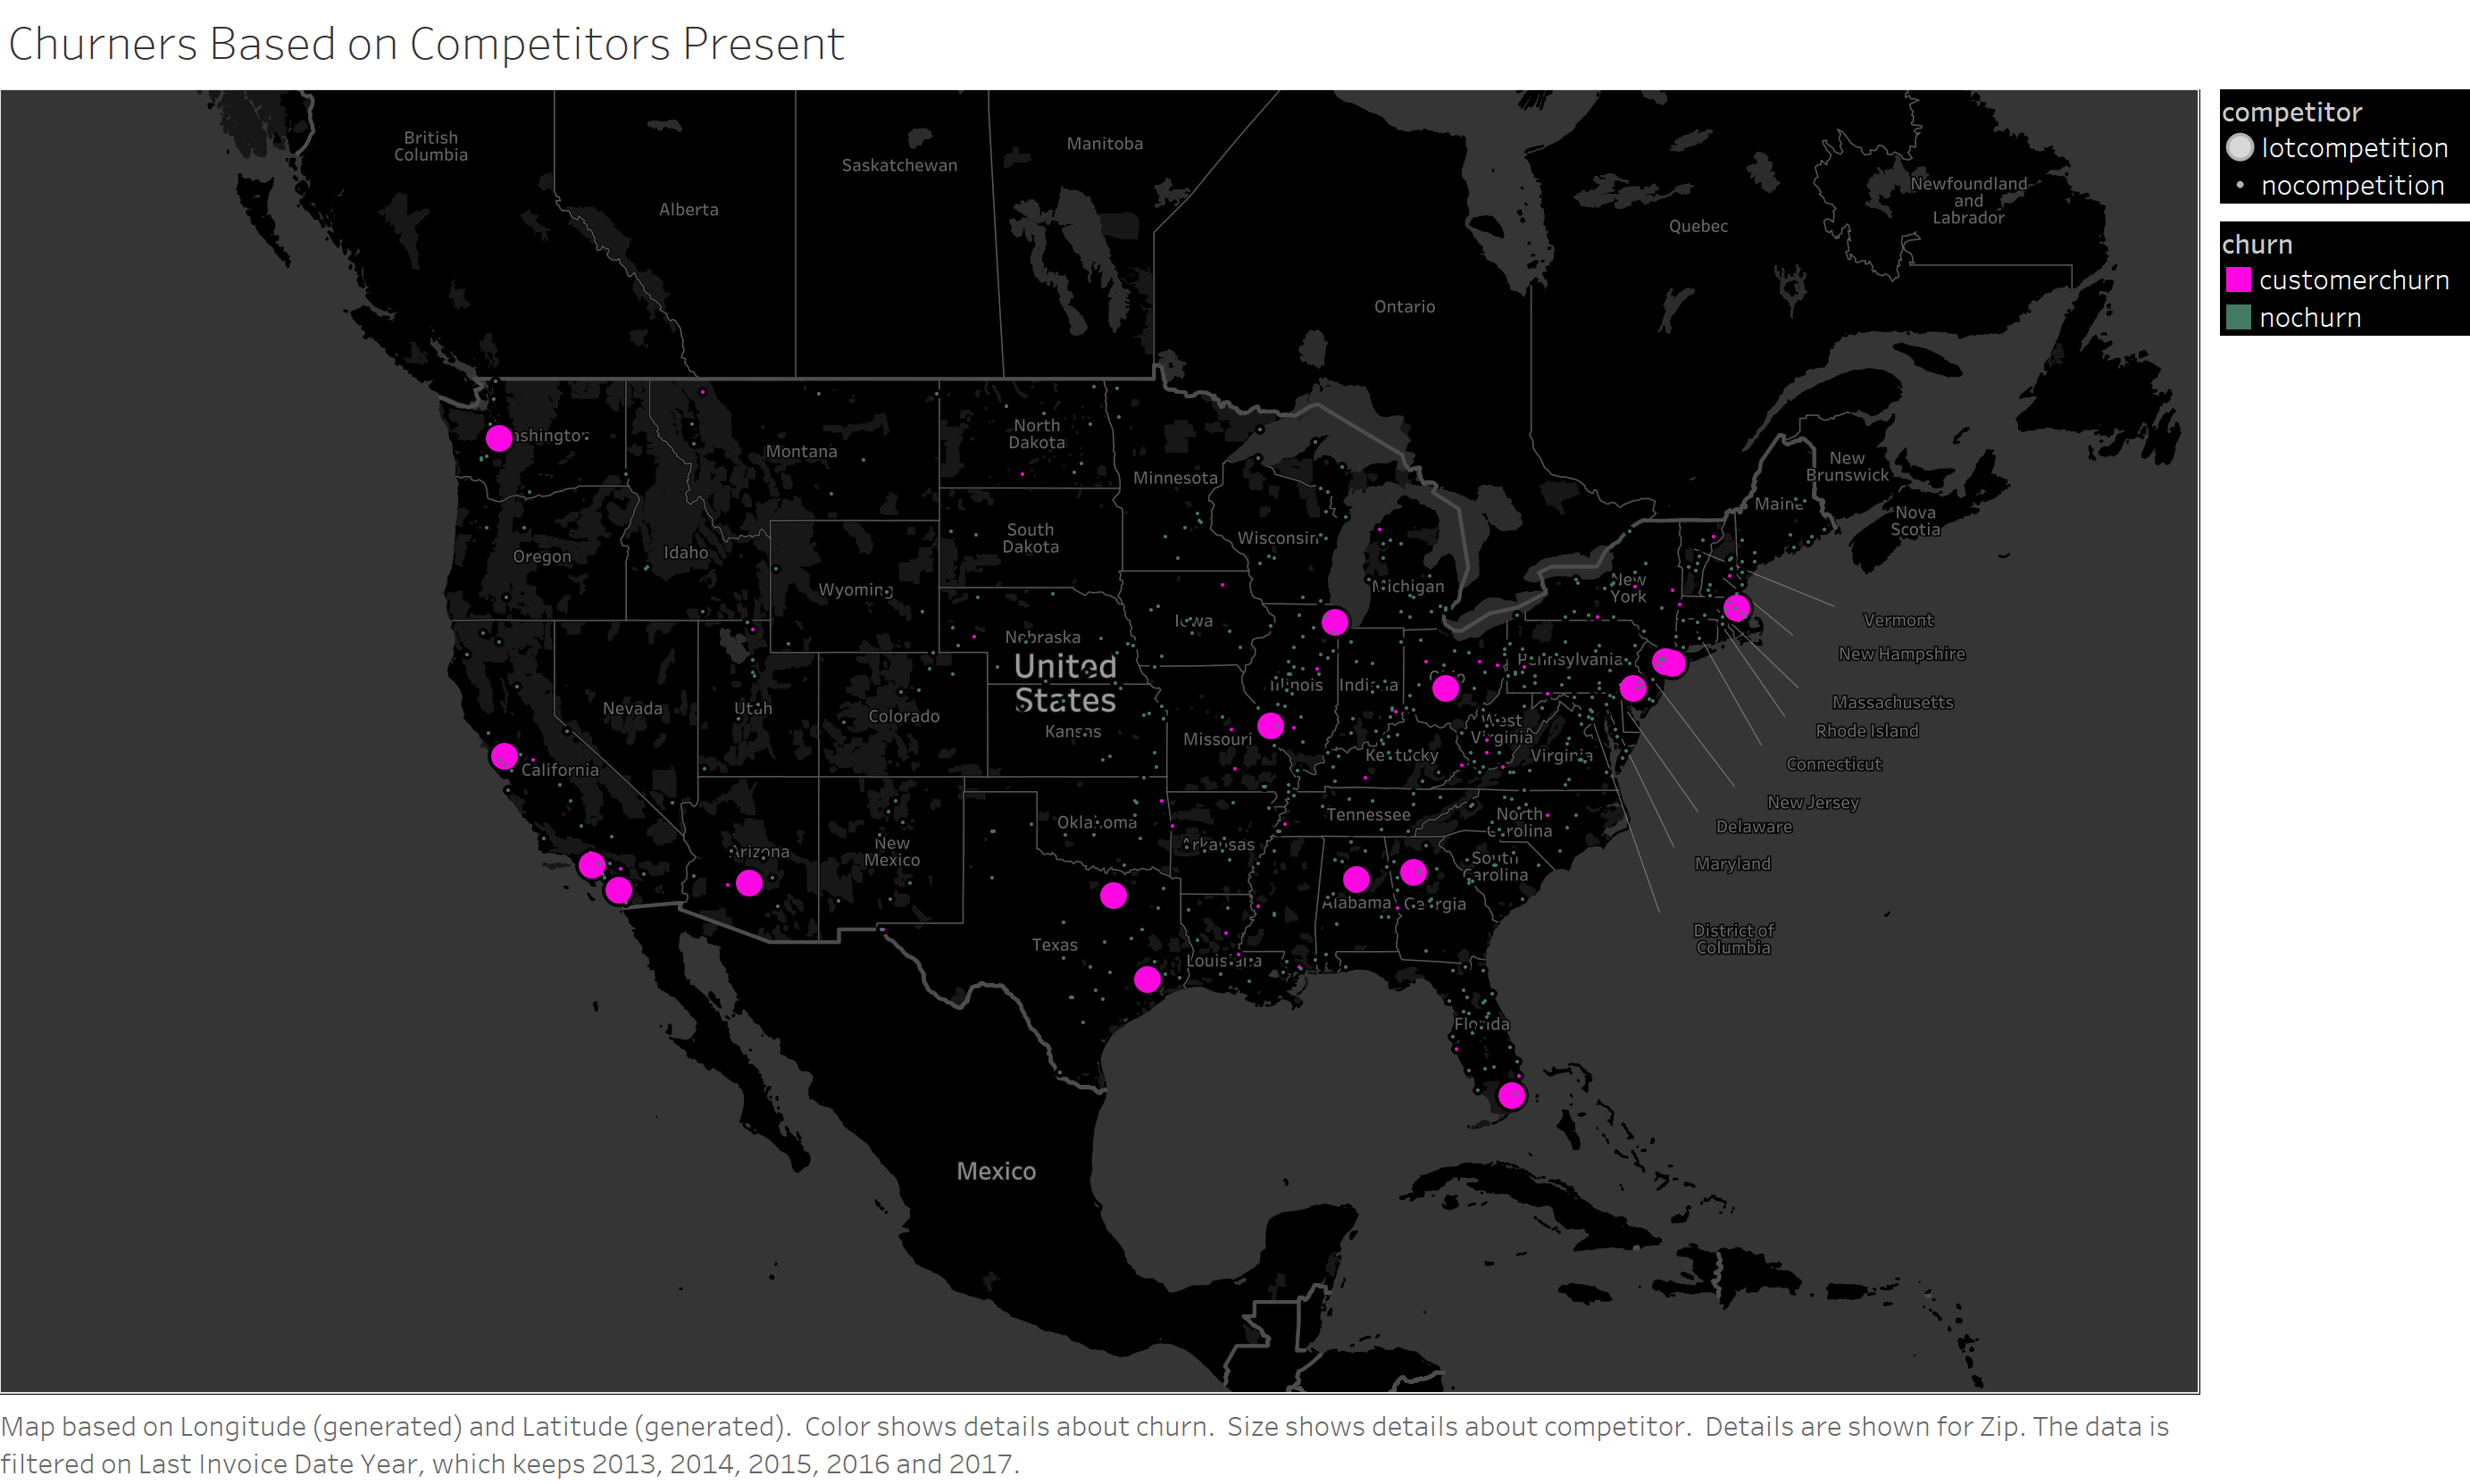

In [111]:
Image(filename='//Users/anish/Downloads/Sheet 2 (5)-2.png', height = 1000, width = 1000)



We can csee that there more churners in areas where there are there are competitors present. Therese seems to be more competition and churners in California and New York. Also as observed before. Churners are more towards the East Coast.

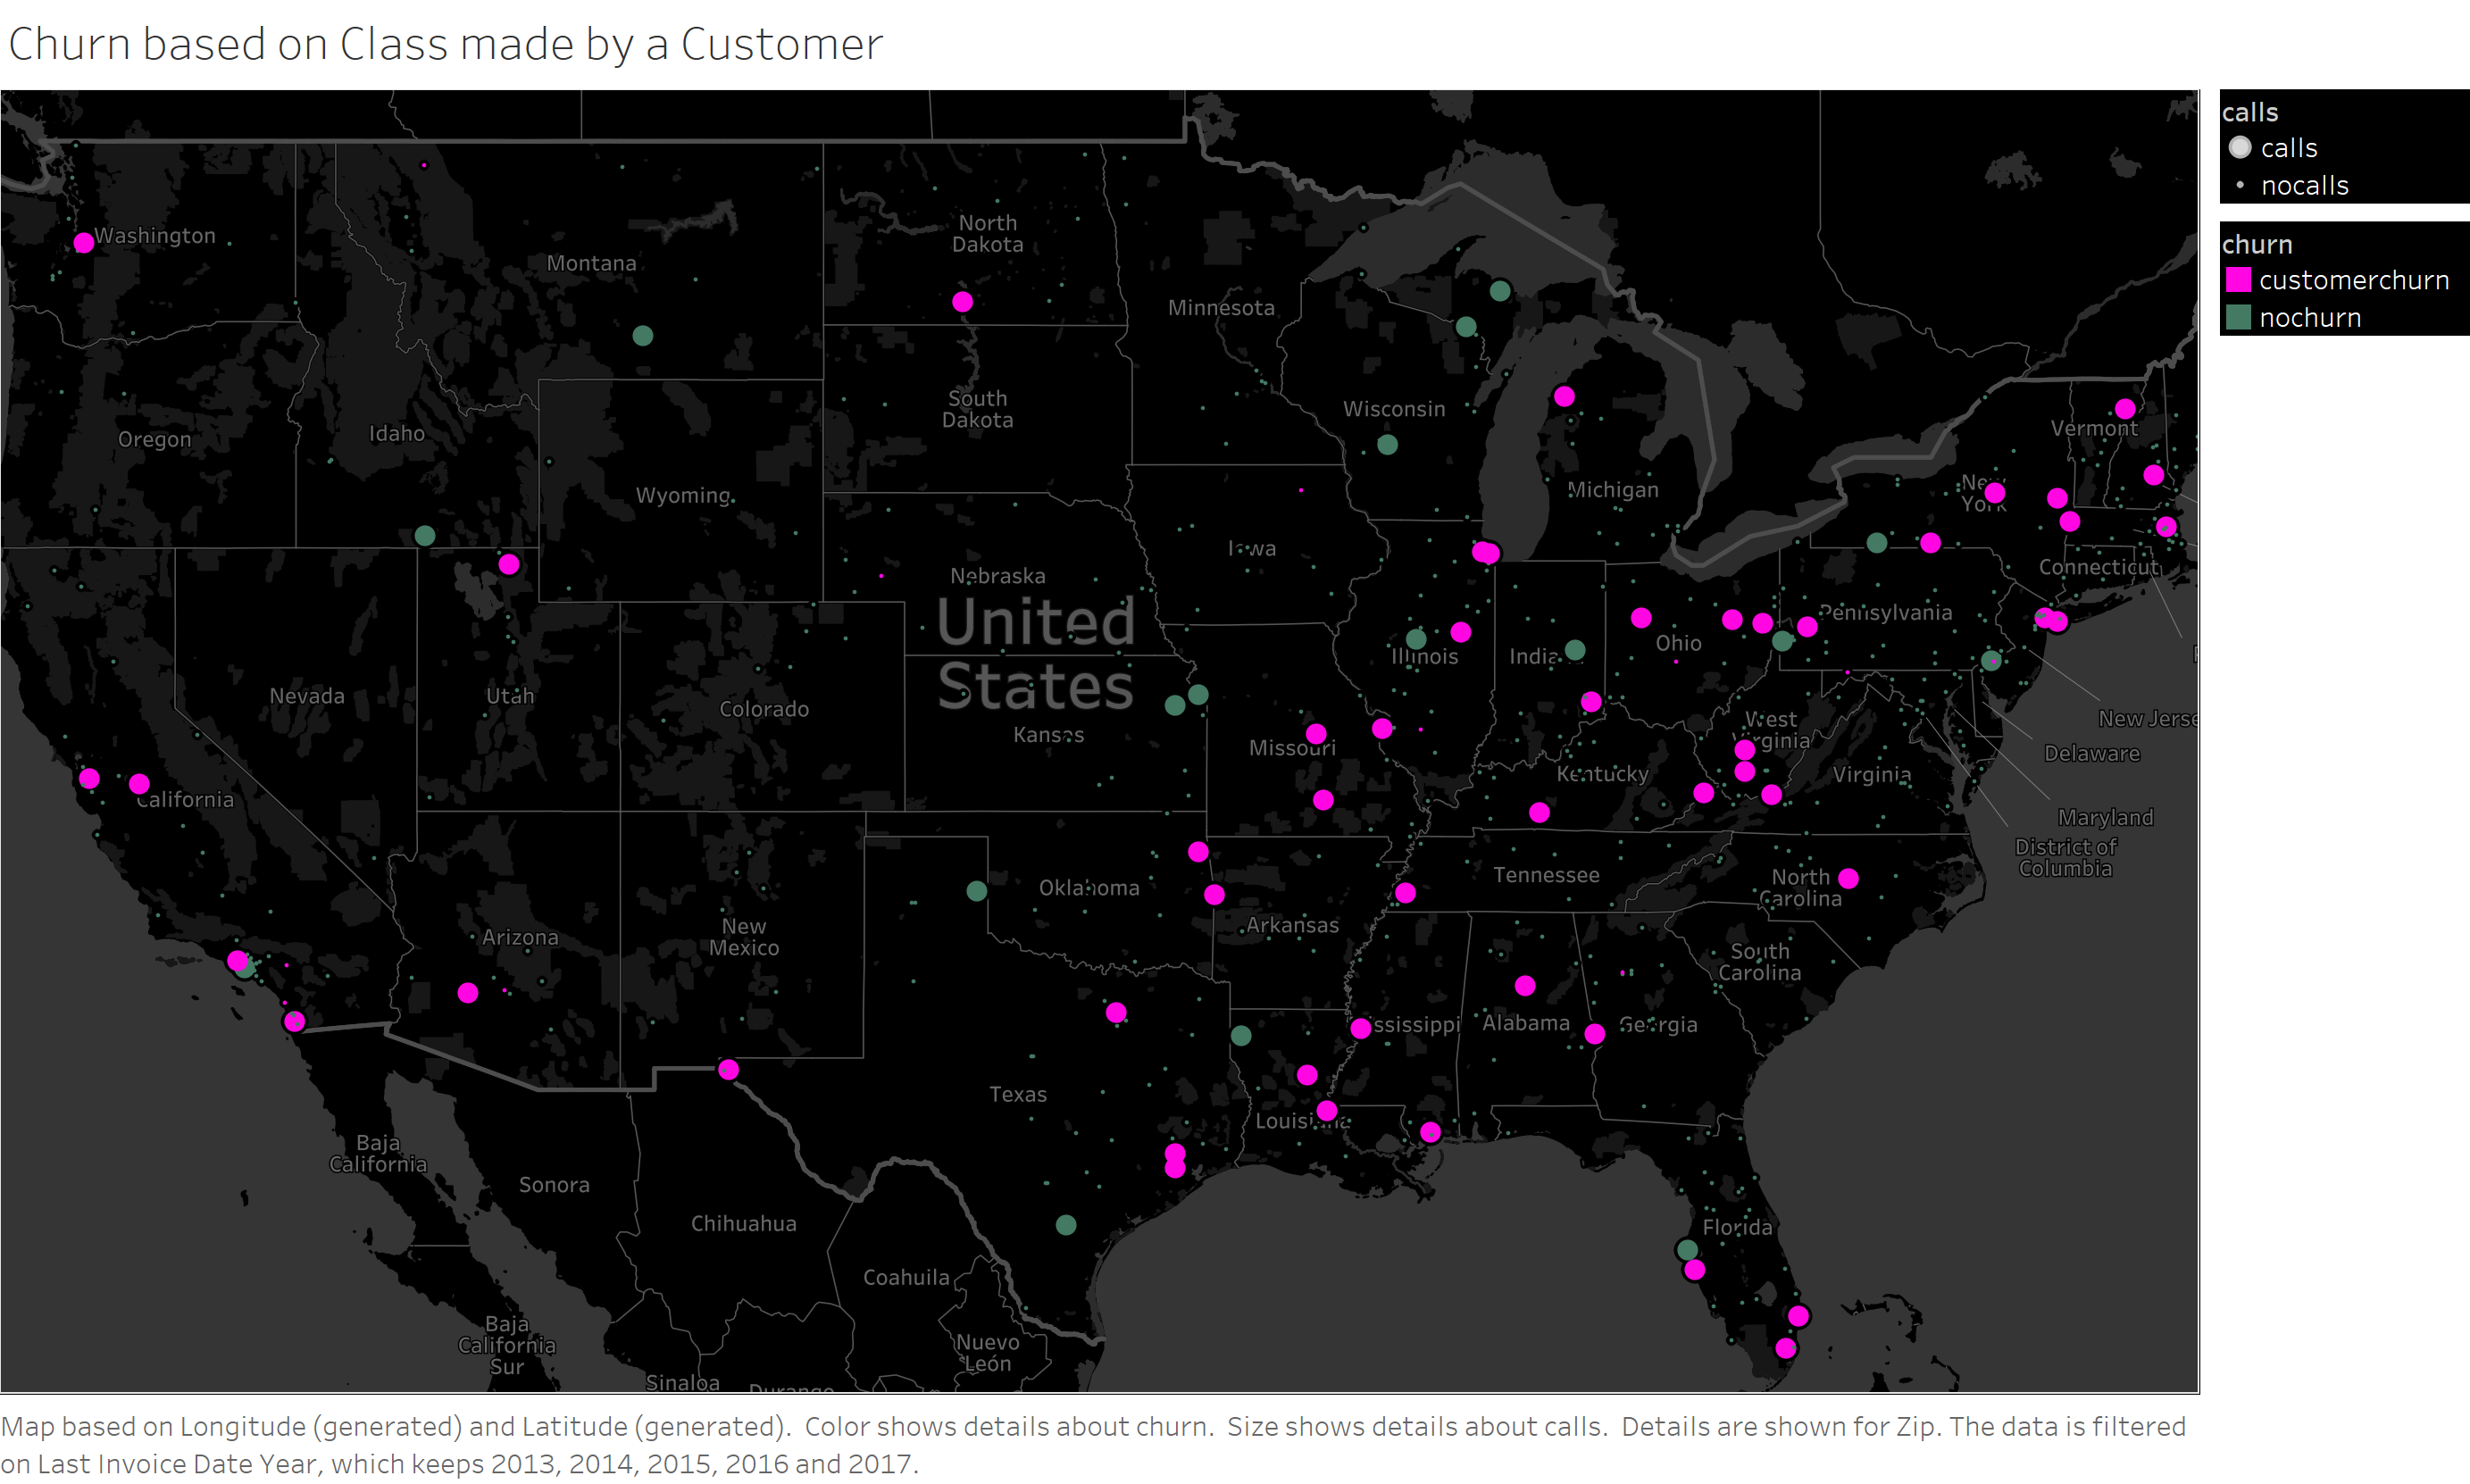

In [112]:
Image(filename='/Users/anish/Downloads/Sheet 2 (7).png', height = 1000, width = 1000)



We can see that there seems to be more Calls in places where there are more churners

# Multivariate Analysis using a Correlation Matrix

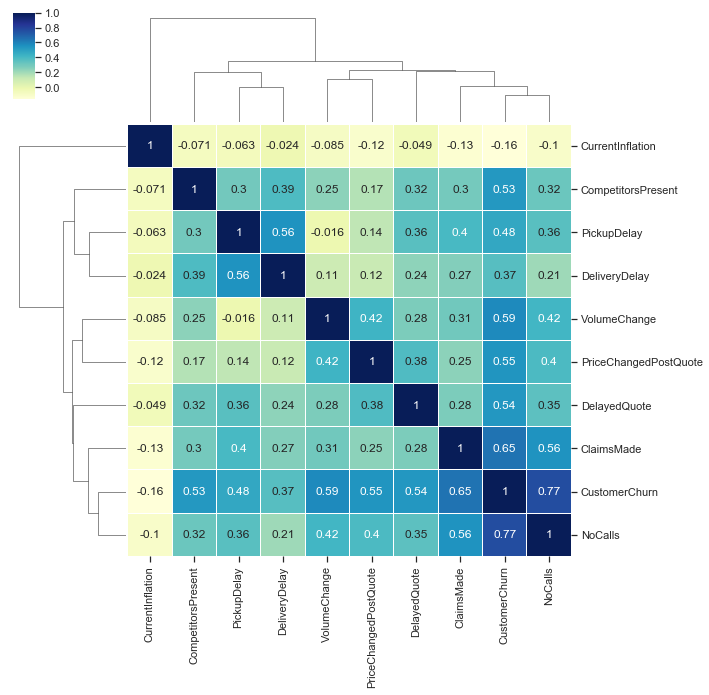

In [54]:
corrmat = df3.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1, annot = True);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

No calls has highest correlation wrt Customer Churn followed by, ClaimsMade

In [122]:
import plotly.plotly as py       
plotly.__version__ 
py.sign_in('anishk12345','v0VL8MD9leBCuCEFyyIY')

In [123]:
import plotly 
import plotly.plotly as py
import plotly.figure_factory as ff

fig = ff.create_facet_grid(
    df1,
    x='DelayedQuote',
    y='ClaimsMade',
    facet_col='CustomerChurn',
     trace_type='box',
)

py.iplot(fig, filename='facet - box traces')

# Model Building

In [124]:
x = df1.drop(df1[['Customer Id', 'CustomerChurn', 'LastInvoiceDate','LocationName','Zip','curr_date']], axis =1)

In [125]:
y = pd.DataFrame()
y['CustomerChurn'] = churn['CustomerChurn']


In [126]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 1 columns):
CustomerChurn    600 non-null int64
dtypes: int64(1)
memory usage: 4.8 KB


In [127]:
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [150]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

Prediction using Train set

In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_train)

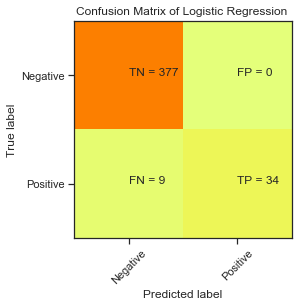

In [130]:
cm = confusion_matrix(y_train, prediction)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):         # This find the TP,TN,FP,FN values and displays it
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [131]:
accuracy1=(cm[0,0]+cm[1,1])/sum(sum(cm))
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9785714285714285
Sensitivity :  1.0
Specificity :  0.7906976744186046


 for Train set, We are getting an accuracy of 97%

> The model is clearly overfitting

> There is class imbalance, which is why its overfitting

> We need to treat the class imbalance

In [132]:
 from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])
roc

0.9788415273579668

Prediction using Test set

In [133]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
prediction1 = lr.predict(x_test)

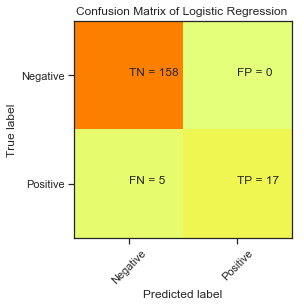

In [134]:
cm = confusion_matrix(y_test, prediction1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):         # This find the TP,TN,FP,FN values and displays it
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [68]:
accuracy1=(cm[0,0]+cm[1,1])/sum(sum(cm))
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9722222222222222
Sensitivity :  1.0
Specificity :  0.7727272727272727


In [135]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

roc1=roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
roc1
idx = np.min(np.where(tpr > 0.95))

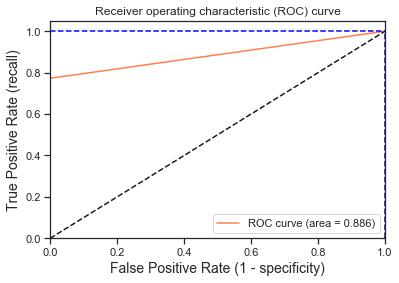

In [136]:
[fpr, tpr, thr] = roc_curve(y_test, prediction1)

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

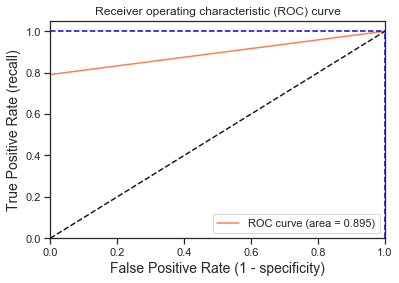

In [137]:
[fpr, tpr, thr] = roc_curve(y_train, prediction)

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [138]:
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test, prediction1)))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       158
           1       1.00      0.77      0.87        22

   micro avg       0.97      0.97      0.97       180
   macro avg       0.98      0.89      0.93       180
weighted avg       0.97      0.97      0.97       180




We can see that our Recall score is 0.77. Recall score is the true positive rate

Using Statsmodel Logistic regression to get a summary

In [140]:
import statsmodels.discrete.discrete_model as sm


In [141]:
lm = sm.Logit(y_train,x_train).fit()

         Current function value: 0.022771
         Iterations: 35


In [142]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          CustomerChurn   No. Observations:                  420
Model:                          Logit   Df Residuals:                      408
Method:                           MLE   Df Model:                           11
Date:                Fri, 28 Dec 2018   Pseudo R-squ.:                  0.9311
Time:                        14:29:39   Log-Likelihood:                -9.5640
converged:                      False   LL-Null:                       -138.72
                                        LLR p-value:                 5.072e-49
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
AvgInvoiceAmount            -0.0004      0.005     -0.075      0.940      -0.011       0.010
AvgMiles                     0.0011      0.052      0.021      0.983      -0.102       0.104
NoCalls                      2.3248      1.239      1.877      0.061      -0.103       4.753
ClaimsMade                  21.1601   6.11e+04      0.000      1.000    -1.2e+05     1.2e+05
DelayedQuote                 3.7759      2.158      1.750      0.080      -0.453       8.005
PickupDelay                  5.3425      2.332      2.291      0.022       0.771       9.914
DeliveryDelay               -4.4497      3.885     -1.145      0.252     -12.064       3.165
VolumeChange                13.7045     33.071      0.414      0.679     -51.113      78.522
PriceChangedPostQuote       21.9080   6757.252      0.003      0.997   -1.32e+04    1.33e+04
CompetitorsPresent          26.9948   8.55e+04      0.000      1.000   -1.67e+05    1.68e+05
CurrentInflation            -2.0126      1.489     -1.352      0.176      -4.931       0.906
days_since_last_purchase    -0.0020      0.002     -1.218      0.223      -0.005       0.001
============================================================================================

Possibly complete quasi-separation: A fraction 0.37 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [143]:
params = lm.params
conf = lm.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                                  2.5%         97.5%            OR
AvgInvoiceAmount          9.894813e-01  1.009844e+00  9.996109e-01
AvgMiles                  9.034720e-01  1.109311e+00  1.001115e+00
NoCalls                   9.018434e-01  1.159208e+02  1.022460e+01
ClaimsMade                0.000000e+00           inf  1.547808e+09
DelayedQuote              6.355105e-01  2.996299e+03  4.363691e+01
PickupDelay               2.162698e+00  2.020402e+04  2.090339e+02
DeliveryDelay             5.762929e-06  2.367904e+01  1.168164e-02
VolumeChange              6.340450e-23  1.263220e+34  8.949515e+05
PriceChangedPostQuote     0.000000e+00           inf  3.269733e+09
CompetitorsPresent        0.000000e+00           inf  5.292792e+11
CurrentInflation          7.220483e-03  2.473273e+00  1.336347e-01
days_since_last_purchase  9.946741e-01  1.001247e+00  9.979552e-01


In [221]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [165]:
df1 = df1.drop('CustomerChurn', axis =1)

In [166]:
df1 = df1.drop(df1[['Customer Id','LastInvoiceDate','Zip','LocationName','curr_date','days_since_last_purchase']], axis = 1)

In [167]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [171]:
gbc.score(x_test,y_test)

0.9944444444444445

In [172]:
feat_importances

NoCalls                     0.624455
PriceChangedPostQuote       0.109838
days_since_last_purchase    0.083546
ClaimsMade                  0.066629
VolumeChange                0.042111
AvgInvoiceAmount            0.017999
CompetitorsPresent          0.017007
AvgMiles                    0.013006
DelayedQuote                0.012424
CurrentInflation            0.008434
PickupDelay                 0.004533
DeliveryDelay               0.000017
dtype: float64

[1.79989369e-02 1.30059484e-02 6.24455376e-01 6.66291171e-02
 1.24242099e-02 4.53301652e-03 1.73153589e-05 4.21111009e-02
 1.09837948e-01 1.70071730e-02 8.43395561e-03 8.35459026e-02]


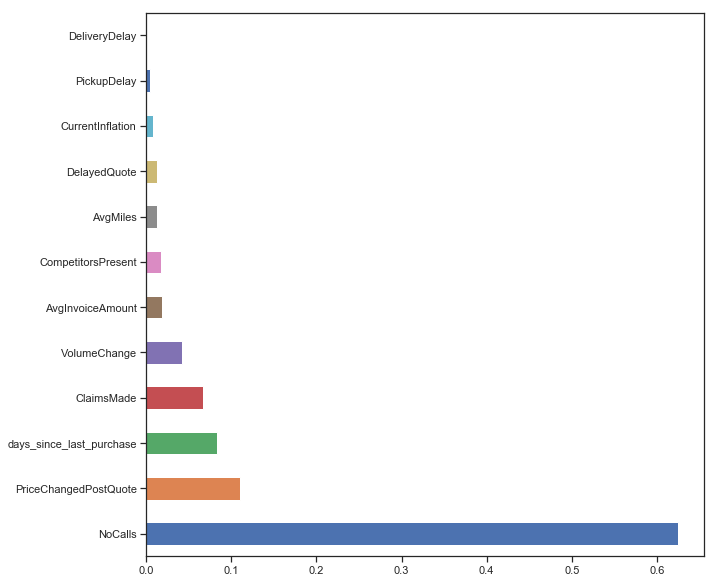

In [173]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

The Bar plot clearly shows the variables that affect Customer Churn the most

In [174]:
from scipy.stats import kstest

In [175]:
kstest(y_test, "norm",mode='asymp')

KstestResult(statistic=0.8413447460685429, pvalue=4.2637074598297596e-111)

In [176]:
kstest(y_train, "norm",mode='asymp')

KstestResult(statistic=0.8413447460685429, pvalue=1.1698511445384548e-258)

In [309]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
AvgMiles            600 non-null float64
AvgInvoiceAmount    600 non-null int64
CustomerChurn       600 non-null int64
dtypes: float64(1), int64(2)
memory usage: 14.1 KB


# Using SMOTE to solve class imbalance in the Train set

In [177]:
# Install the imblearn package to use SMOTE

In [178]:
from imblearn.over_sampling import SMOTE


First let us check how logistic regression performs without using smote

In [179]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

0.9722222222222222

In [180]:
confusion_matrix(y_test, y_pred)

array([[158,   0],
       [  5,  17]], dtype=int64)

In [181]:
recall_score(y_test, y_pred)


0.7727272727272727

We get a recall score of only 77

In [182]:
y_train['CustomerChurn'].value_counts()


0    377
1     43
Name: CustomerChurn, dtype: int64

Let's try using smote now. We are using Oversampling in our case as rasining out 1 values to 377 is better than reducing 377 to 43

In [193]:
smt = SMOTE()
x_train_new, y_train_new = smt.fit_sample(x_train, y_train)

In [194]:
np.bincount(y_train_new)


array([377, 377], dtype=int64)

Our values are now balanced. Lets check the accuracy and recall score again.

In [195]:
lr.fit(x_train_new, y_train_new)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

0.9888888888888889

In [196]:
confusion_matrix(y_test, y_pred)


array([[157,   1],
       [  1,  21]], dtype=int64)

In [197]:
recall_score(y_test, y_pred)


0.9545454545454546

Clearly our Recall score has significantly improved comapred to before. This is the better model.

Now let's check all the other performing measures

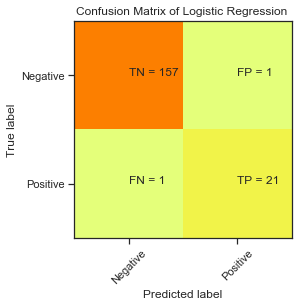

In [198]:
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):         # This find the TP,TN,FP,FN values and displays it
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [199]:
accuracy1=(cm[0,0]+cm[1,1])/sum(sum(cm))
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9888888888888889
Sensitivity :  0.9936708860759493
Specificity :  0.9545454545454546


In [200]:
roc=roc_auc_score(y_train_new, lr.predict_proba(x_train_new)[:,1])
roc

0.9978892414637406

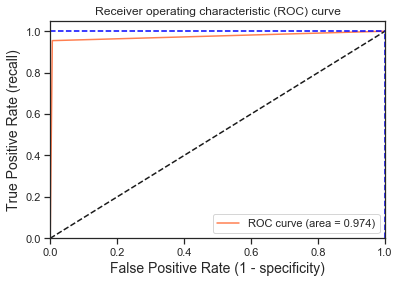

In [202]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

The model seems to perform well

Let's try using Stratified CV

In [225]:
from sklearn import cross_validation


In [241]:
X = x.as_matrix().astype(np.float)
y = churn['CustomerChurn'].as_matrix().astype(np.int)
y.size

600

In [242]:
X.shape


(600, 12)

In [243]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [244]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold: 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [245]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.99
Support vector machine(SVM):   0.98
Random Forest Classifier:      0.99
K Nearest Neighbor Classifier: 0.98
Logistic Regression:           0.99


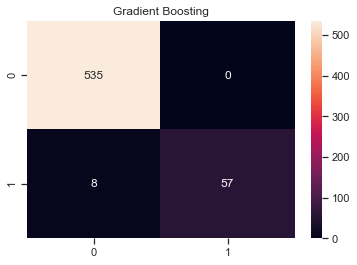

In [246]:
grad_ens_conf_matrix      = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

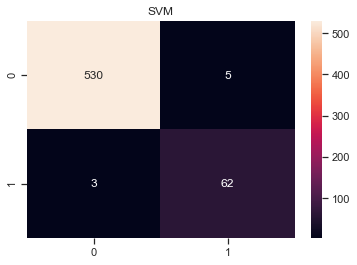

In [247]:
svm_svc_conf_matrix       = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

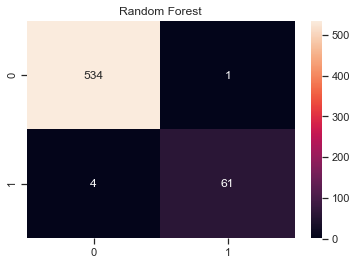

In [248]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

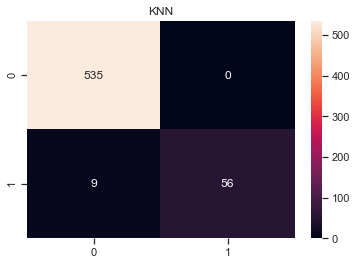

In [249]:
k_neighbors_conf_matrix   = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
sns.heatmap(k_neighbors_conf_matrix, annot=True,  fmt='');
title = 'KNN'
plt.title(title);

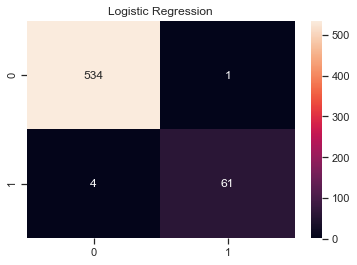

In [250]:
logistic_reg_conf_matrix  = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
sns.heatmap(logistic_reg_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

In [252]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       535
           1       0.98      0.92      0.95        65

   micro avg       0.99      0.99      0.99       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.99      0.99      0.99       600


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       535
           1       0.93      0.95      0.94        65

   micro avg       0.99      0.99      0.99       600
   macro avg       0.96      0.97      0.97       600
weighted avg       0.99      0.99      0.99       600


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       535
           1       1.00      0.92      0.96        65

   micro avg       0.99      0.99      0.99       600
   macro avg       1.00      0.96     